# **1. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [118]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from google.colab import drive

# **2. Memuat Dataset dari Hasil Clustering**

Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.

In [119]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [120]:
# Baca file CSV
df = pd.read_csv('/content/drive/MyDrive/dataset/beverage_sales_clustered.csv')

In [121]:
# Tampilkan DataFrame untuk memastikan telah dibaca dengan benar
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7585 entries, 0 to 7584
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unit_Price     7585 non-null   float64
 1   Quantity       7585 non-null   float64
 2   Discount       7585 non-null   float64
 3   Total_Price    7585 non-null   float64
 4   Customer_Type  7585 non-null   object 
 5   Product        7585 non-null   object 
 6   Category       7585 non-null   object 
 7   Region         7585 non-null   object 
 8   Cluster        7585 non-null   int64  
dtypes: float64(4), int64(1), object(4)
memory usage: 533.4+ KB


In [122]:
df.head(10)

,Unit_Price,Quantity,Discount,Total_Price,Customer_Type,Product,Category,Region,Cluster
0,1.04,7.0,0.00,7.28,B2C,Coca-Cola,Soft Drinks,Bremen,0
1,0.71,46.0,0.10,29.39,B2B,Selters,Water,Sachsen-Anhalt,1
2,2.68,30.0,0.05,76.38,B2B,Monster,Soft Drinks,Schleswig-Holstein,2
3,0.91,3.0,0.00,2.73,B2C,San Pellegrino,Water,Hessen,0
4,1.41,4.0,0.00,5.64,B2C,Beck's,Alcoholic Beverages,Bremen,0
5,0.86,3.0,0.00,2.58,B2C,San Pellegrino,Water,Berlin,0
6,1.64,6.0,0.00,9.84,B2C,Granini Apple,Juices,Rheinland-Pfalz,0
7,3.56,14.0,0.00,49.84,B2C,Cranberry Juice,Juices,Bayern,0
8,4.32,14.0,0.00,60.48,B2C,Riesling,Alcoholic Beverages,Saarland,0
9,1.59,12.0,0.00,19.08,B2C,Granini Apple,Juices,Schleswig-Holstein,0


# **3. Data Splitting**

Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

In [123]:
# Pisahkan fitur (X) dan target (y)
X = df.drop(columns=['Cluster'])  # Cluster sebagai target
y = df['Cluster'] # Target

X.head()

,Unit_Price,Quantity,Discount,Total_Price,Customer_Type,Product,Category,Region
0,1.04,7.0,0.00,7.28,B2C,Coca-Cola,Soft Drinks,Bremen
1,0.71,46.0,0.10,29.39,B2B,Selters,Water,Sachsen-Anhalt
2,2.68,30.0,0.05,76.38,B2B,Monster,Soft Drinks,Schleswig-Holstein
3,0.91,3.0,0.00,2.73,B2C,San Pellegrino,Water,Hessen
4,1.41,4.0,0.00,5.64,B2C,Beck's,Alcoholic Beverages,Bremen


In [124]:
# Buat instance MinMaxScaler
min_max_scaler = MinMaxScaler()

# Normalisasi semua kolom numerik
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns
X[numerical_cols] = min_max_scaler.fit_transform(X[numerical_cols])

X.head()

,Unit_Price,Quantity,Discount,Total_Price,Customer_Type,Product,Category,Region
0,0.119730,0.089552,0.0,0.042480,B2C,Coca-Cola,Soft Drinks,Bremen
1,0.064081,0.671642,1.0,0.178600,B2B,Selters,Water,Sachsen-Anhalt
2,0.396290,0.432836,0.5,0.467894,B2B,Monster,Soft Drinks,Schleswig-Holstein
3,0.097808,0.029851,0.0,0.014468,B2C,San Pellegrino,Water,Hessen
4,0.182125,0.044776,0.0,0.032383,B2C,Beck's,Alcoholic Beverages,Bremen


In [125]:
# Membuat instance LabelEncoder
encoder = LabelEncoder()

# Melakukan encoding pada kolom kategorikal
categorical_cols = X.select_dtypes(include=['object']).columns
for column in categorical_cols:
    X[column] = encoder.fit_transform(X[column])

X.head()

,Unit_Price,Quantity,Discount,Total_Price,Customer_Type,Product,Category,Region
0,0.119730,0.089552,0.0,0.042480,1,5,2,4
1,0.064081,0.671642,1.0,0.178600,0,32,3,13
2,0.396290,0.432836,0.5,0.467894,0,20,2,14
3,0.097808,0.029851,0.0,0.014468,1,29,3,6
4,0.182125,0.044776,0.0,0.032383,1,2,0,4


In [126]:
# Split data menjadi set pelatihan dan set uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Menampilkan bentuk set pelatihan dan set uji untuk memastikan split
print(f"Training set shape: X_train={X_train.shape}, y_train={y_train.shape}")
print(f"Test set shape: X_test={X_test.shape}, y_test={y_test.shape}")

Training set shape: X_train=(6068, 8), y_train=(6068,)
Test set shape: X_test=(1517, 8), y_test=(1517,)


# **4. Membangun Model Klasifikasi**


## **a. Membangun Model Klasifikasi**

Setelah memilih algoritma klasifikasi yang sesuai, langkah selanjutnya adalah melatih model menggunakan data latih.

Berikut adalah rekomendasi tahapannya.
1. Pilih algoritma klasifikasi yang sesuai, seperti Logistic Regression, Decision Tree, Random Forest, atau K-Nearest Neighbors (KNN).
2. Latih model menggunakan data latih.

In [127]:
# Model Logistic Regression
lr_model = LogisticRegression(random_state=42, max_iter=500)
lr_model.fit(X_train, y_train)
print("Model Logistic Regression telah ditraining")

# Model Random Forest
rf_model = RandomForestClassifier(random_state=42, n_estimators=100, max_depth=10)
rf_model.fit(X_train, y_train)
print("Model Random Forest telah ditraining")

# Model Gaussian Naive Bayes Classifier
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
print("Model Gaussian Naive Bayes Classifier telah ditraining")

# Menampilkan hasil training
print("\nHasil Akurasi Data Training:")
print(f"Logistic Regression: {lr_model.score(X_train, y_train):.4f}")
print(f"Random Forest: {rf_model.score(X_train, y_train):.4f}")
print(f"Gaussian Naive Bayes Classifier: {nb_model.score(X_train, y_train):.4f}")

Model Logistic Regression telah ditraining
Model Random Forest telah ditraining
Model Gaussian Naive Bayes Classifier telah ditraining

Hasil Akurasi Data Training:
Logistic Regression: 0.9984
Random Forest: 1.0000
Gaussian Naive Bayes Classifier: 0.9871


>  **Alasan Pemilihan Algoritma**

Setelah dilakukan percobaan dengan menggunakan berbagai algoritma pemodelan, tiga algoritma berikut dipilih karena hasil akurasi menunjukkan performa yang konsisten tinggi dan sesuai dengan karakteristik dataset yang digunakan.

1.   Logistic Regression
    * Prinsip kerjanya adalah menggunakan fungsi sigmoid untuk mengubah kombinasi linier dari fitur menjadi nilai probabilitas.
    * Dipilih karena sederhana, cepat dilatih, dan efektif untuk data yang memiliki hubungan linier antara fitur dan target serta distribusi cluster yang terdefinisi dengan baik. Selain itu, memberikan informasi mengenai bobot tiap fitur, sehingga dapat membantu memahami antar fitur dan target.
2.   Random Forest
    * Prinsip kerjanya yaitu membuat sejumlah pohon keputusan dari subset acak dari data pelatihan dan subset acak dari fitur (fitur yang digunakan untuk membagi data pada setiap pohon), serta menggabungkan prediksinya melalui voting atau rata-rata. Dari tiap pohon keputusan ini akan memberikan prediksi dan hasil akhirnya berupa hasil mayoritas atau hasil rata-rata.
    * Dipilih karena kemampuannya menangani data kompleks dengan hubungan non-linear, dan ketahanan terhadap overfitting. Fleksibilitasnya terhadap data yang robust terhadap noise dan fitur yang tidak penting.
3.   Gaussian Naive Bayes Classifier
    * Prinsip kerjanya yaitu menghitung probabilitas setiap kelas berdasarkan distribusi normal (Gaussian) dari data fitur. Dengan mengasumsikan bahwa fitur-fitur dalam data saling independen, sehingga kita dapat menghitung probabilitas kelas dengan mengalikan probabilitas masing-masing fitur. Dan memilih kelas dengan probabilitas tertinggi.
    * Dipilih karena cepat, efektif untuk data berdistribusi normal, dan efektif untuk dataset dengan banyak fitur.



## **b. Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Lakukan prediksi menggunakan data uji.
2. Hitung metrik evaluasi seperti Accuracy dan F1-Score (Opsional: Precision dan Recall).
3. Buat confusion matrix untuk melihat detail prediksi benar dan salah.

In [128]:
unique_labels = sorted(set(y))

Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0    1.00000   1.00000   1.00000      1116
           1    0.98930   0.98930   0.98930       187
           2    0.99065   0.99065   0.99065       214

    accuracy                        0.99736      1517
   macro avg    0.99332   0.99332   0.99332      1517
weighted avg    0.99736   0.99736   0.99736      1517



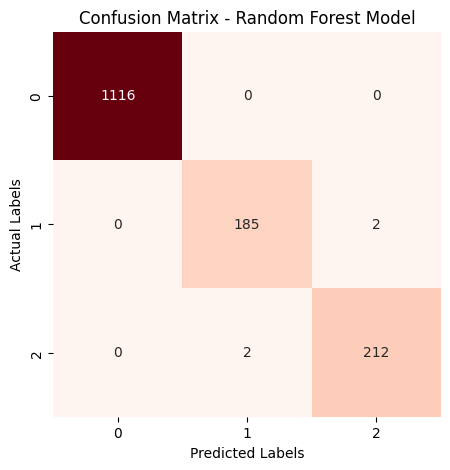

In [129]:
# Model Logistic Regression
lr_y_predict = lr_model.predict(X_test)
print("Logistic Regression Classification Report:\n", classification_report(y_test, lr_y_predict, digits=5))

# Visualisasi Confusion Matrix untuk algoritma Logistic Regression
lr_cm = confusion_matrix(y_test, lr_y_predict)
plt.figure(figsize=(5, 5))
sns.heatmap(lr_cm, annot=True, fmt='d', cmap='Reds', cbar=False,
            xticklabels=unique_labels,
            yticklabels=unique_labels)

plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix - Random Forest Model')
plt.show()
print('\n')

Random Forest Classification Report:
               precision    recall  f1-score   support

           0    1.00000   1.00000   1.00000      1116
           1    1.00000   1.00000   1.00000       187
           2    1.00000   1.00000   1.00000       214

    accuracy                        1.00000      1517
   macro avg    1.00000   1.00000   1.00000      1517
weighted avg    1.00000   1.00000   1.00000      1517



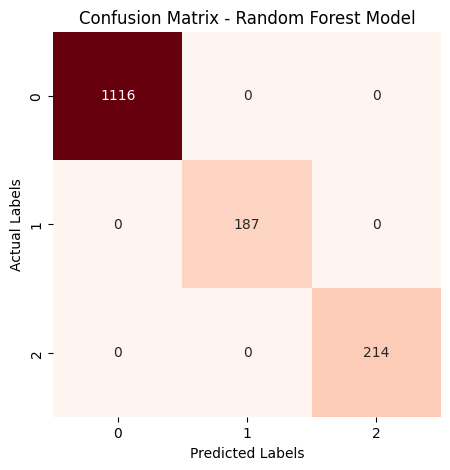

In [130]:
# Model Random Forest
rf_y_predict = rf_model.predict(X_test)
print("Random Forest Classification Report:\n", classification_report(y_test, rf_y_predict, digits=5))

# Visualisasi Confusion Matrix untuk algoritma random forest
rf_cm = confusion_matrix(y_test, rf_y_predict)
plt.figure(figsize=(5, 5))
sns.heatmap(rf_cm, annot=True, fmt='d', cmap='Reds', cbar=False,
            xticklabels=unique_labels,
            yticklabels=unique_labels)

plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix - Random Forest Model')
plt.show()
print('\n')

Gaussian Naive Bayes Classifier Classification Report:
               precision    recall  f1-score   support

           0    1.00000   1.00000   1.00000      1116
           1    0.93229   0.95722   0.94459       187
           2    0.96172   0.93925   0.95035       214

    accuracy                        0.98616      1517
   macro avg    0.96467   0.96549   0.96498      1517
weighted avg    0.98625   0.98616   0.98617      1517



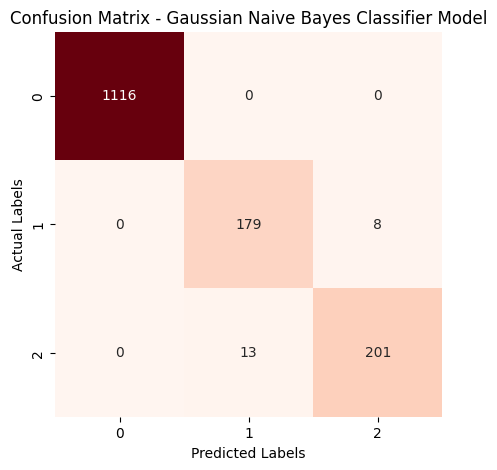

In [131]:
# Model Gaussian Naive Bayes Classifier
nb_y_predict = nb_model.predict(X_test)
print("Gaussian Naive Bayes Classifier Classification Report:\n", classification_report(y_test, nb_y_predict, digits=5))

# Visualisasi Confusion Matrix untuk algoritma Gaussian Naive Bayes Classifier
nb_cm = confusion_matrix(y_test, nb_y_predict)
plt.figure(figsize=(5, 5))
sns.heatmap(nb_cm, annot=True, fmt='d', cmap='Reds', cbar=False,
            xticklabels=unique_labels,
            yticklabels=unique_labels)

plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix - Gaussian Naive Bayes Classifier Model')
plt.show()
print('\n')

Tulis hasil evaluasi algoritma yang digunakan, jika Anda menggunakan 2 algoritma, maka bandingkan hasilnya.


Hasil Evaluasi Model:
                  Model  Accuracy  Precision (Macro)  Recall (Macro)  \
0   Logistic Regression  0.997363           0.993320        0.993320   
1         Random Forest  1.000000           1.000000        1.000000   
2  Gaussian Naive Bayes  0.986157           0.964671        0.965491   

   F1-Score (Macro)  
0          0.993320  
1          1.000000  
2          0.964982  


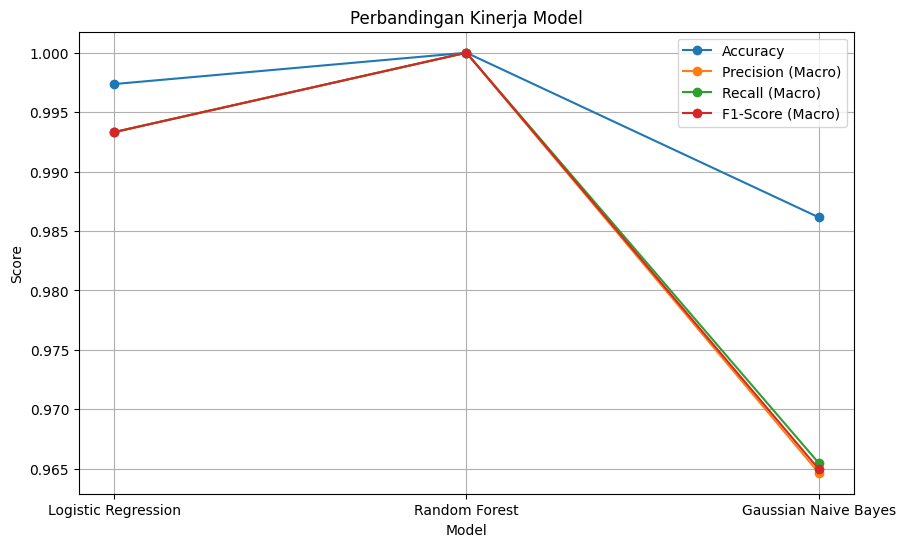

In [132]:
# Inisialisasi dictionary untuk menyimpan hasil evaluasi
evaluation_results = {
    "Model": [],
    "Accuracy": [],
    "Precision (Macro)": [],
    "Recall (Macro)": [],
    "F1-Score (Macro)": []
}

# Fungsi untuk menghitung metrik evaluasi
def evaluate_model(model_name, y_true, y_pred):
    evaluation_results["Model"].append(model_name)
    evaluation_results["Accuracy"].append(accuracy_score(y_true, y_pred))
    evaluation_results["Precision (Macro)"].append(precision_score(y_true, y_pred, average='macro'))
    evaluation_results["Recall (Macro)"].append(recall_score(y_true, y_pred, average='macro'))
    evaluation_results["F1-Score (Macro)"].append(f1_score(y_true, y_pred, average='macro'))

# Evaluasi Logistic Regression
evaluate_model("Logistic Regression", y_test, lr_y_predict)

# Evaluasi Random Forest
evaluate_model("Random Forest", y_test, rf_y_predict)

# Evaluasi Gaussian Naive Bayes
evaluate_model("Gaussian Naive Bayes", y_test, nb_y_predict)

# Membuat DataFrame untuk hasil evaluasi
df_evaluation = pd.DataFrame(evaluation_results)

# Menampilkan hasil evaluasi
print("\nHasil Evaluasi Model:")
print(df_evaluation)

# Visualisasi perbandingan hasil evaluasi
plt.figure(figsize=(10, 6))
metrics = ["Accuracy", "Precision (Macro)", "Recall (Macro)", "F1-Score (Macro)"]
for metric in metrics:
    plt.plot(df_evaluation["Model"], df_evaluation[metric], marker='o', label=metric)

plt.title("Perbandingan Kinerja Model")
plt.xlabel("Model")
plt.ylabel("Score")
plt.legend()
plt.grid(True)
plt.show()

## **c. Tuning Model Klasifikasi (Optional)**

Gunakan GridSearchCV, RandomizedSearchCV, atau metode lainnya untuk mencari kombinasi hyperparameter terbaik

In [133]:
# Logistic Regression Model Hyperparameter Tuning
lr_param_dist = {
    'C': np.logspace(-3, 3, 7),  # Regularization parameter
    'penalty': ['l1', 'l2'],     # Regularization type
    'solver': ['liblinear', 'saga'],  # Solver algorithm for optimization
    'max_iter': [100, 200, 300]
}

grid_lr = GridSearchCV(estimator=LogisticRegression(random_state=69),
                       param_grid=lr_param_dist,
                       cv=3,
                       verbose=2,
                       n_jobs=-1)
grid_lr.fit(X_train, y_train)
best_lr_model = grid_lr.best_estimator_
print("\nBest Parameters for Logistic Regression:")
print(grid_lr.best_params_)
print(f"Best Score: {grid_lr.best_score_:.5f}\n")

# Random Forest Model Hyperparameter Tuning
rf_param_dist = {
    'n_estimators': np.arange(50, 500, 50),      # Number of trees in the forest
    'max_depth': np.arange(5, 50, 5),           # Maximum depth of each tree
    'min_samples_split': np.arange(2, 20, 2),   # Minimum samples required to split a node
    'min_samples_leaf': np.arange(1, 20, 2),    # Minimum samples required to be at a leaf node
    'max_features': [None, 'sqrt', 'log2'],     # The number of features to consider at each split
    'bootstrap': [True, False]                  # Whether bootstrap samples are used when building trees
}

rf_random_search = RandomizedSearchCV(estimator=RandomForestClassifier(random_state=69),
                                      param_distributions=rf_param_dist,
                                      n_iter=100,  # Number of random combinations to test
                                      cv=3,        # 3-fold cross-validation
                                      verbose=2,
                                      random_state=69,
                                      n_jobs=-1)

rf_random_search.fit(X_train, y_train)
best_rf_model = rf_random_search.best_estimator_
print("\nBest Parameters for Random Forest:")
print(rf_random_search.best_params_)
print(f"Best Score: {rf_random_search.best_score_:.5f}\n")

# Naive Bayes Model Hyperparameter Tuning
nb_param_dist = {
    'var_smoothing': np.logspace(0, -9, num=100)  # Smoothing parameter
}

nb_random_search = RandomizedSearchCV(estimator=GaussianNB(),
                                      param_distributions=nb_param_dist,
                                      n_iter=100,
                                      cv=3,
                                      verbose=2,
                                      random_state=69,
                                      n_jobs=-1)

nb_random_search.fit(X_train, y_train)
best_nb_model = nb_random_search.best_estimator_
print("\nBest Parameters for Naive Bayes:")
print(nb_random_search.best_params_)
print(f"Best Score: {nb_random_search.best_score_:.5f}\n")

# Summary Table
import pandas as pd

results = {
    "Model": ["Logistic Regression", "Random Forest", "Naive Bayes"],
    "Best Parameters": [grid_lr.best_params_, rf_random_search.best_params_, nb_random_search.best_params_],
    "Best Score (CV)": [grid_lr.best_score_, rf_random_search.best_score_, nb_random_search.best_score_]
}

results_df = pd.DataFrame(results)
print("\nSummary of Hyperparameter Tuning Results:")
results_df


Fitting 3 folds for each of 84 candidates, totalling 252 fits

Best Parameters for Logistic Regression:
{'C': np.float64(10.0), 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}
Best Score: 0.99951

Fitting 3 folds for each of 100 candidates, totalling 300 fits

Best Parameters for Random Forest:
{'n_estimators': np.int64(50), 'min_samples_split': np.int64(18), 'min_samples_leaf': np.int64(19), 'max_features': 'sqrt', 'max_depth': np.int64(10), 'bootstrap': True}
Best Score: 1.00000

Fitting 3 folds for each of 100 candidates, totalling 300 fits

Best Parameters for Naive Bayes:
{'var_smoothing': np.float64(3.5111917342151275e-06)}
Best Score: 0.98731


Summary of Hyperparameter Tuning Results:


,Model,Best Parameters,Best Score (CV)
0,Logistic Regression,"{'C': 10.0, 'max_iter': 100, 'penalty': 'l1', ...",0.999506
1,Random Forest,"{'n_estimators': 50, 'min_samples_split': 18, ...",1.000000
2,Naive Bayes,{'var_smoothing': 3.5111917342151275e-06},0.987310


In [134]:
results_df

,Model,Best Parameters,Best Score (CV)
0,Logistic Regression,"{'C': 10.0, 'max_iter': 100, 'penalty': 'l1', ...",0.999506
1,Random Forest,"{'n_estimators': 50, 'min_samples_split': 18, ...",1.000000
2,Naive Bayes,{'var_smoothing': 3.5111917342151275e-06},0.987310


In [135]:
# Logistic Regression Model Hyperparameter Tuning
lr_param_dist = {
    'C': np.logspace(-3, 3, 7),  # Regularization parameter
    'penalty': ['l1', 'l2'],     # Regularization type
    'solver': ['liblinear', 'saga'],  # Solver algorithm for optimization
    'max_iter': [100, 200, 300]
}
grid_lr = GridSearchCV(estimator=LogisticRegression(random_state=42),
                       param_grid=lr_param_dist,
                       cv=3,
                       verbose=2,
                       n_jobs=-1,
                       error_score='raise'
                       )
grid_lr.fit(X_train, y_train)

Fitting 3 folds for each of 84 candidates, totalling 252 fits


GridSearchCV(cv=3, error_score='raise',
             estimator=LogisticRegression(random_state=42), n_jobs=-1,
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'max_iter': [100, 200, 300], 'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'saga']},
             verbose=2)



> **Insight**

  * Logistic Regression memiliki ruang hyperparameter yang relatif kecil dan terdefinisi dengan baik, seperti penalty, C, dan solver.

  * Metode Tuning:
GridSearchCV cocok digunakan karena semua kombinasi hyperparameter dapat dieksplorasi secara menyeluruh. Logistic Regression memiliki hyperparameter yang relatif sedikit sehingga GridSearchCV tidak terlalu membebani waktu komputasi.

  * Kombinasi Parameter:
    * Total kombinasi = 7x2x2x3= 84
    * Cross-Validation (CV): 3-fold CV berarti setiap kombinasi parameter dipecah menjadi 3 bagian untuk validasi.
    * Total fit = 84x3 = 252


In [136]:
# Random Forest Model Hyperparameter Tuning
rf_param_dist = {
    'n_estimators': np.arange(50, 500, 50),  # Number of trees in the forest
    'max_depth': np.arange(5, 50, 5),         # Maximum depth of each tree
    'min_samples_split': np.arange(2, 20, 2), # Minimum samples required to split a node
    'min_samples_leaf': np.arange(1, 20, 2),  # Minimum samples required to be at a leaf node
    'max_features': [None, 'sqrt', 'log2'], # The number of features to consider at each split
    'bootstrap': [True, False]                # Whether bootstrap samples are used when building trees
}

# Perform RandomizedSearchCV for RandomForest
rf_random_search = RandomizedSearchCV(estimator=RandomForestClassifier(random_state=42),  # Model to tune
                                        param_distributions=rf_param_dist,  # Hyperparameter search space
                                        n_iter=100,  # Number of random combinations to test
                                        cv=3,  # 3-fold cross-validation for model evaluation
                                        verbose=2,  # Show detailed progress during the search
                                        random_state=69,  # Set seed for reproducibility
                                        n_jobs=-1  # Use all CPU cores for parallel processing
)

# Fit the model on the training data
rf_random_search.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': array([ 5, 10, 15, 20, 25, 30, 35, 40, 45]),
                                        'max_features': [None, 'sqrt', 'log2'],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 50, 100, 150, 200, 250, 300, 350, 400, 450])},
                   random_state=69, verbose=2)

In [137]:
# Naive Bayes Model Hyperparameter Tuning
nb_param_dist = {
    'var_smoothing': np.logspace(0, -9, num=100)  # Smoothing parameter
}

# Perform RandomizedSearchCV for Naive Bayes
nb_random_search = RandomizedSearchCV(estimator=GaussianNB(),
                                      param_distributions=nb_param_dist,
                                      n_iter=100,
                                      cv=3,
                                      verbose=2,
                                      random_state=42,
                                      n_jobs=-1)

# Fit the model on the training data
nb_random_search.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=GaussianNB(), n_iter=100, n_jobs=-1,
                   param_distributions={'var_smoothing': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000000e-01,
       8.11130831e-02, 6.57933225e-02, 5.33669923e-02, 4.32876128e-0...
       1.23284674e-07, 1.00000000e-07, 8.11130831e-08, 6.57933225e-08,
       5.33669923e-08, 4.32876128e-08, 3.51119173e-08, 2.84803587e-08,
       2.31012970e-08, 1.87381742e-08, 1.51991108e-08, 1.23284674e-08,
       1.00000000e-08, 8.11130831e-09, 6.57933225e-09, 5.33669923e-09,
       4.32876128e-09, 3.51119173e-09, 2.84803587e-09, 2.31012970e-09,
       1.87381742e-09, 1.51991108e-09, 1.23284674e-09, 1.00000000e-09])},
                   random_state=42, verbose=2)



> **Insight**

  * RandomizedSearchCV digunakan pada Random Forest dan Naive Bayes untuk menghemat waktu dan komputasi, terutama dalam situasi dengan ruang pencarian yang kompleks.
  * Random Forest memiliki banyak kombinasi hyperparameter yang mungkin.
  * Gaussian Naive Bayes memiliki parameter kontinu yang dapat dieksplorasi secara efisien dengan pencarian acak.
  * Jumlah Kombinasi Acak dengan metode RandomizedSearchCV : jumlah kombinasi yang diuji tidak semua, tetapi terbatas dengan parameter n_iter= 100
  * Cross-Validation (CV) : Total fit = 100 x 3 = 300

## **d. Evaluasi Model Klasifikasi setelah Tuning (Optional)**

Berikut adalah rekomendasi tahapannya.
1. Gunakan model dengan hyperparameter terbaik.
2. Hitung ulang metrik evaluasi untuk melihat apakah ada peningkatan performa.

In [138]:
# ------------Model Logistic Regression------------
# Menampilkan parameter terbaik dan skor akurasi dari model Logistic Regression
print("Best Logistic Regression Hyperparameters:", grid_lr.best_params_)
print("Best Logistic Regression Accuracy:", grid_lr.best_score_)

# Memprediksi dan mengevaluasi model Logistic Regression
lr_best_model = grid_lr.best_estimator_
lr_best_model_y_pred = lr_best_model.predict(X_test)
print("\nLogistic Regression (best model) Classification Report:\n", classification_report(y_test, lr_best_model_y_pred, digits=5))


# -----------Model Random Forest-------------------
# Menampilkan parameter terbaik dan skor akurasi dari model Random Forest
print("Best Random Forest Hyperparameters:", rf_random_search.best_params_)
print("Best Random Forest Accuracy:", rf_random_search.best_score_)

# Memprediksi dan mengevaluasi model Random Forest
rf_best_model = rf_random_search.best_estimator_
rf_best_model_y_pred = rf_best_model.predict(X_test)
print("Random Forest (best model) Classification Report:\n", classification_report(y_test, rf_best_model_y_pred, digits=5))


# -----------Model Gaussian Naive Bayes-------------
# Menampilkan parameter terbaik dan skor akurasi dari model Gaussian Naive Bayes
print("Best Naive Bayes Hyperparameters:", nb_random_search.best_params_)
print("Best Naive Bayes Accuracy:", nb_random_search.best_score_)

# Memprediksi dan mengevaluasi model Gaussian Naive Bayes
nb_best_model = nb_random_search.best_estimator_
nb_best_model_y_pred = nb_best_model.predict(X_test)
print("Naive Bayes (best model) Classification Report:\n", classification_report(y_test, nb_best_model_y_pred, digits=5))

Best Logistic Regression Hyperparameters: {'C': np.float64(10.0), 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}
Best Logistic Regression Accuracy: 0.9995055216477701

Logistic Regression (best model) Classification Report:
               precision    recall  f1-score   support

           0    1.00000   1.00000   1.00000      1116
           1    1.00000   1.00000   1.00000       187
           2    1.00000   1.00000   1.00000       214

    accuracy                        1.00000      1517
   macro avg    1.00000   1.00000   1.00000      1517
weighted avg    1.00000   1.00000   1.00000      1517

Best Random Forest Hyperparameters: {'n_estimators': np.int64(450), 'min_samples_split': np.int64(4), 'min_samples_leaf': np.int64(3), 'max_features': None, 'max_depth': np.int64(25), 'bootstrap': True}
Best Random Forest Accuracy: 1.0
Random Forest (best model) Classification Report:
               precision    recall  f1-score   support

           0    1.00000   1.00000   1.0000

In [139]:
# Menghitung hasil klasifikasi untuk ketiga model
lr_best_report = classification_report(y_test, lr_best_model_y_pred, digits=5, output_dict=True)
rf_best_report = classification_report(y_test, rf_best_model_y_pred, digits=5, output_dict=True)
nb_best_report = classification_report(y_test, nb_best_model_y_pred, digits=5, output_dict=True)

# Melakukan ekstraksi metrik yang relevan (accuracy, precision, recall, F1 score)
print(f"Evaluasi model setelah tuning (Logistic Regression):\n{lr_best_report}")
print(f"Evaluasi model setelah tuning (Random Forest):\n{rf_best_report}")
print(f"Evaluasi model setelah tuning (Naive Bayes):\n{nb_best_report}")
metrics_relevant = {
    'Model': ['Logistic Regression (Tuned)','Random Forest (Tuned)', 'Naive Bayes (Tuned)'],
    'Accuracy': [lr_best_report['accuracy'], rf_best_report['accuracy'], nb_best_report['accuracy']],
    'Precision': [lr_best_report['weighted avg']['precision'], rf_best_report['weighted avg']['precision'], nb_best_report['weighted avg']['precision']],
    'Recall': [lr_best_report['weighted avg']['recall'], rf_best_report['weighted avg']['recall'], nb_best_report['weighted avg']['recall']],
    'F1-Score': [lr_best_report['weighted avg']['f1-score'], rf_best_report['weighted avg']['f1-score'], nb_best_report['weighted avg']['f1-score']]
}

# Create a DataFrame
df_tuned = pd.DataFrame(metrics_relevant)

df_tuned

Evaluasi model setelah tuning (Logistic Regression):
{'0': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 1116.0}, '1': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 187.0}, '2': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 214.0}, 'accuracy': 1.0, 'macro avg': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 1517.0}, 'weighted avg': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 1517.0}}
Evaluasi model setelah tuning (Random Forest):
{'0': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 1116.0}, '1': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 187.0}, '2': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 214.0}, 'accuracy': 1.0, 'macro avg': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 1517.0}, 'weighted avg': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 1517.0}}
Evaluasi model setelah tuning (Naive Bayes):
{'0': {'precision': 1.0, 

,Model,Accuracy,Precision,Recall,F1-Score
0,Logistic Regression (Tuned),1.000000,1.000000,1.000000,1.000000
1,Random Forest (Tuned),1.000000,1.000000,1.000000,1.000000
2,Naive Bayes (Tuned),0.985498,0.985564,0.985498,0.985506


## **e. Analisis Hasil Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Bandingkan hasil evaluasi sebelum dan setelah tuning (jika dilakukan).
2. Identifikasi kelemahan model, seperti:
  - Precision atau Recall rendah untuk kelas tertentu.
  - Apakah model mengalami overfitting atau underfitting?
3. Berikan rekomendasi tindakan lanjutan, seperti mengumpulkan data tambahan atau mencoba algoritma lain jika hasil belum memuaskan.



> **1. Perbandingan Hasil Evaluasi Sebelum dan Setelah Tuning**

*   Sebelum Tuning: Logistic Regression memiliki performa yang baik dengan akurasi tinggi, namun tidak mencapai nilai sempurna seperti performa Random Forest.

*   Setelah Tuning: Semua model mengalami peningkatan performa. Logistic Regression dan Random Forest mencapai performa sempurna (akurasi, precision, recall, dan F1-score = 1.0), sedangkan Naive Bayes menunjukkan performa baik namun dengan peningkatan minor.

*   Kesimpulan: Tuning hyperparameter memberikan efek signifikan terutama untuk meningkatkan performa pada model Logistic Regression.


> **Identifikasi Kelemahan Model**

*   Logistic Regression dan Random Forest tidak menunjukkan kelemahan signifikan setelah tuning.

*   Naive Bayes menunjukkan kelemahan kecil dalam F1-score dibanding dua model lainnya, yang kemungkinan disebabkan oleh asumsi independensi fitur yang tidak selalu terpenuhi dalam data.

*   Overfitting kemungkinan terjadi pada Logistic Regression dan Random Forest karena akurasi sempurna pada data uji, yang perlu diwaspadai jika performa ini tidak sama pada data baru.


> **Rekomendasi Tindakan Lanjutan**

*   Perlu lebih banyak data untuk memastikan model generalisasi lebih baik, terutama untuk Random Forest dan Logistic Regression yang menunjukkan kemungkinan overfitting.

*   Analisis distribusi data: Periksa apakah distribusi data antar kelas seimbang, karena ketidakseimbangan dapat memengaruhi hasil model (terutama Naive Bayes).

*   Rekomendasi : gunakan model Random Forest untuk hasil yang optimal, terutama jika tidak ada keterbatasan komputasi. Namun, jika efisiensi menjadi prioritas atau dataset sederhana, Logistic Regression dapat menjadi alternatif yang sangat baik.

